<a href="https://colab.research.google.com/github/GabiiKatherin/estatistica_com_python/blob/main/Estatistica_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn
import scipy

In [ ]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % seaborn.__version__)
print('Versão do scipy -> %s' % scipy.__version__)

Versão do pandas -> 1.5.3
Versão do numpy -> 1.23.5
Versão do seaborn -> 0.12.2
Versão do scipy -> 1.10.1


In [2]:
# sep: define o tipo de separador
dados = pd.read_csv('dados.csv', sep = ',')

In [3]:
#consulta o tamanho da base (linhas, colunas):
dados.shape

(76840, 7)

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### **1.2 - Tipos de dados:**

Variáveis **qualitativas ordinais**: podem ser ordenadas ou hierarquizadas.

In [ ]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Variáveis **qualitativas nominais**: não podem ser ordenadas ou hierarquizadas.

In [ ]:
sorted(dados['UF'].unique())

In [ ]:
sorted(dados['Sexo'].unique())

[0, 1]

Acima, mesmo que 0 e 1 sejam números, eles não estão ordenados, pois representam masculino e feminino, respectivamente.

In [ ]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

Variáveis **qualitativas discretas**: representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [ ]:
print('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


Observação: A idade pode ser classificada de várias formas dependendo da situação:
- Quantitativa **discreta**: com números completos (ex: 13, 40, 60 anos);
- Quantitativa **contínua**: idade exata, com frações de anos (ex: 22,5 anos);
- Quantitativa **ordinal**: quando representa faixas de idade (ex: de 13 à 18 anos).

In [ ]:
print('De %s até %s metros de altura.' % (dados.Altura.min(), dados.Altura.max()))

De 1.339244614 até 2.028496765 metros de altura.


Variáveis **quantitativas contínuas**: representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

# Variáveis quantitativas

In [46]:
dados.Renda.min()

0

In [47]:
dados.Renda.max()

200000

In [48]:
#uma lista com os limites das classes que eu quero construir:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [49]:
labels = ['E','D','C','B','A']

In [50]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [51]:
pd.cut( x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True )

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [52]:
pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [53]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [54]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [55]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending = True, inplace = True)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


####2.3 - Distribuição de frequências para variáveis quantitativas (classes e amplitude fixa):

In [21]:
#numpy importado no início

#Fómula para o cálculo classes na dist. de freq.
n = dados.shape[0]
k = 1 + (10/3) * np.log10(n)

#Arredondando o k:
k = int(k.round(0))

print('Uma forma ótima de visualizar meus registros é com', k, 'classes')

Uma forma ótima de visualizar meus registros é com 17 classes


In [29]:
#Criar a tabela
#Value counts vai um sort dos números que aparecem à direita
frequencia = pd.value_counts(
                  pd.cut(
                      x = dados.Renda,
                      bins = 17,
                      #inclue o limite mais baixo
                      include_lowest = True
                  ),
                  #Ajuste a ordenação pelas classes
                  sort = False
                )
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [31]:
percentual = pd.value_counts(
                  pd.cut(
                      x = dados.Renda,
                      bins = 17,
                      include_lowest = True
                  ),
                  sort = False,
                  normalize = True
                )
percentual

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [42]:
dist_freq_quantitativas_amplitura_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitura_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


####Histograma

In [33]:
import seaborn as sns

<ipython-input-36-8a96cdaf1f2b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura, kde = False)


Text(0.5, 0, 'Metros')

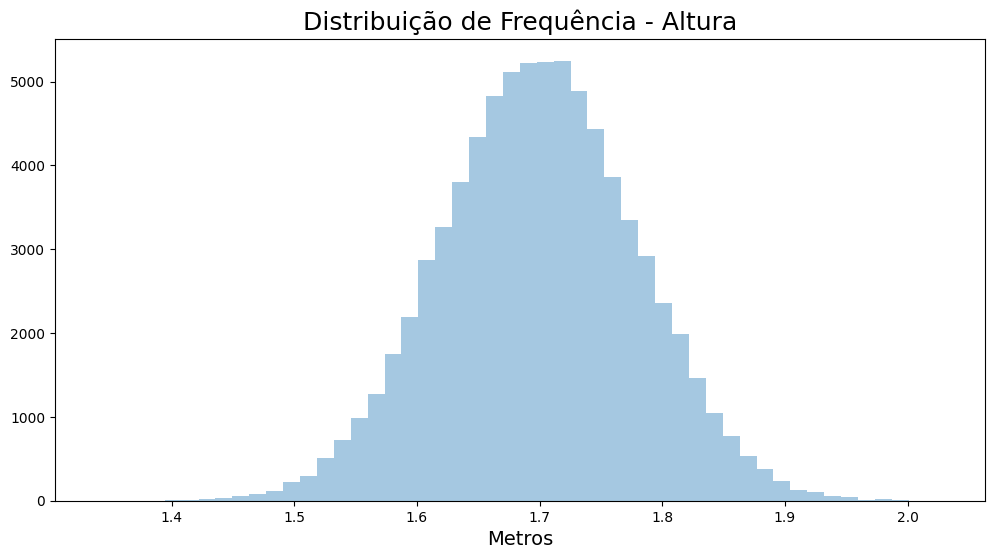

In [36]:
ax = sns.distplot(dados.Altura, kde = False)
#kde é uma função de densidade traçada junto do histograma.

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

<Axes: >

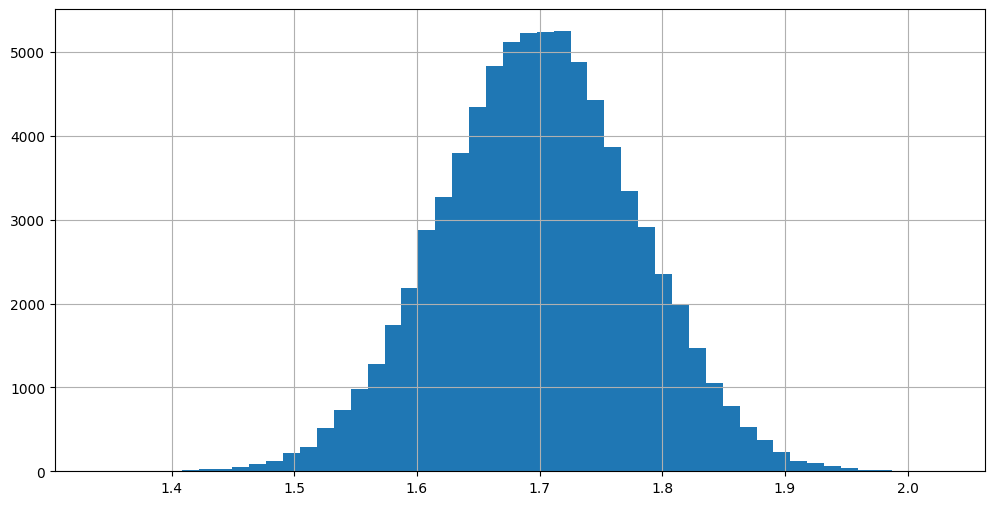

In [38]:
#Usando Pandas
dados.Altura.hist(bins = 50, figsize=(12,6))

In [56]:
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


<Axes: >

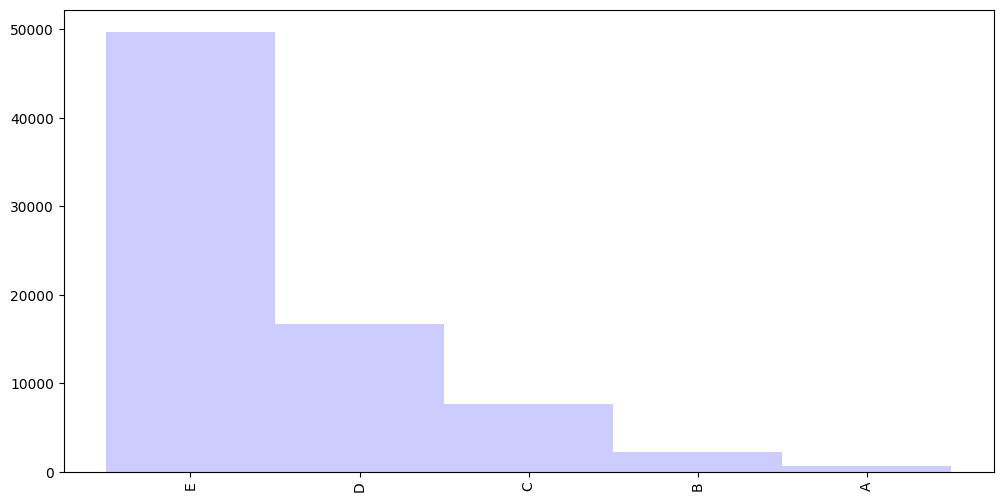

In [58]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(12,6))